<a href="https://colab.research.google.com/github/meliskarayigit/Energy-Consumption-Forecast-Models-Comparision/blob/main/dsai_energy_consumption2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DAYTON_hourly.csv to DAYTON_hourly.csv


Eksik veriler:
 Datetime     0
DAYTON_MW    0
dtype: int64

Zaman farkı sıklıkları:
 Datetime
0 days 01:00:00      116193
-2 days +01:00:00      5038
0 days 02:00:00          24
728 days 01:00:00         6
729 days 01:00:00         6
0 days 00:00:00           4
455 days 01:00:00         1
-2 days +02:00:00         1
577 days 01:00:00         1
Name: count, dtype: int64

Aykırı değer sayısı: 1535


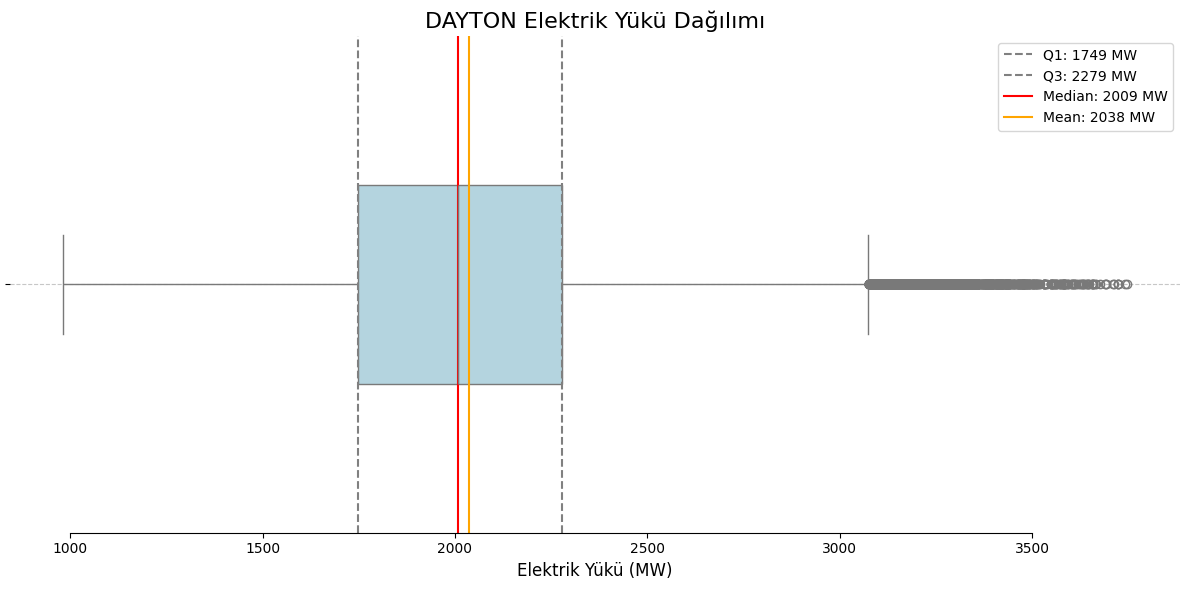

<ipython-input-3-680212db9659>:61: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=df['Datetime'].min(), end=df['Datetime'].max(), freq='H')



Eksik saat sayısı: 25
             Datetime  DAYTON_MW
0 2004-10-01 01:00:00     1621.0
1 2004-10-01 02:00:00     1536.0
2 2004-10-01 03:00:00     1500.0
3 2004-10-01 04:00:00     1434.0
4 2004-10-01 05:00:00     1489.0


<ipython-input-3-680212db9659>:70: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# --- 1. Veriyi Yükle ---
df = pd.read_csv("DAYTON_hourly.csv")

# --- 2. Tarih Formatı ve Veri Türleri ---
df['Datetime'] = pd.to_datetime(df['Datetime'])

# --- 3. Eksik Verileri Kontrol Et ---
print("Eksik veriler:\n", df.isnull().sum())

# --- 4. Zaman Aralığı Kontrolü ---
time_diff = df['Datetime'].diff().value_counts()
print("\nZaman farkı sıklıkları:\n", time_diff)

# --- 5. Aykırı Değer Analizi (IQR) ---
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['DAYTON_MW'] < Q1 - 1.5 * IQR) | (df['DAYTON_MW'] > Q3 + 1.5 * IQR)]
print(f"\nAykırı değer sayısı: {len(outliers)}")
# Temel istatistikler (Basic Statistics)
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
median = df['DAYTON_MW'].median()
mean = df['DAYTON_MW'].mean()
min_val = df['DAYTON_MW'].min()
max_val = df['DAYTON_MW'].max()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plot
plt.figure(figsize=(12, 6))  # Increased figure height for better readability
sns.boxplot(x=df['DAYTON_MW'], color='lightblue', width=0.4)  # Adjusted box width

# Referans çizgileri (Reference Lines) - Improved styling and clarity
plt.axvline(Q1, color='gray', linestyle='--', label=f'Q1: {Q1:.0f} MW')
plt.axvline(Q3, color='gray', linestyle='--', label=f'Q3: {Q3:.0f} MW')
plt.axvline(median, color='red', linestyle='-', label=f'Median: {median:.0f} MW')
plt.axvline(mean, color='orange', linestyle='-', label=f'Mean: {mean:.0f} MW')

# Removed min/max and outlier bound lines for cleaner look
# You can add them back if necessary

# Başlık ve etiketler (Title and Labels)
plt.title("DAYTON Elektrik Yükü Dağılımı", fontsize=16)  # More concise title
plt.xlabel("Elektrik Yükü (MW)", fontsize=12)  # Increased font size
plt.ylabel("")  # Removed unnecessary y-axis label
plt.legend(loc='upper right', fontsize=10)  # Adjusted legend font size

# Improved aesthetics
sns.despine(trim=True, left=True)  # Removed top and right spines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added subtle gridlines

plt.tight_layout()
plt.show()

# Eksik zamanları kontrol et
full_range = pd.date_range(start=df['Datetime'].min(), end=df['Datetime'].max(), freq='H')
missing_times = set(full_range) - set(df['Datetime'])
print(f"\nEksik saat sayısı: {len(missing_times)}")


# 2. Zaman damgalarını tekilleştir (duplicate varsa ortalamasını al)
df = df.groupby('Datetime').mean().sort_index()

# 3. Saatlik zaman serisi oluştur (eksik saatleri dahil et)
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(full_range)

# 4. Eksik değerleri zaman tabanlı interpolasyonla doldur
df['DAYTON_MW'] = df['DAYTON_MW'].interpolate(method='time')

# 5. Aykırı değerleri IQR yöntemiyle tespit edip kırp
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['DAYTON_MW'] = df['DAYTON_MW'].clip(lower=lower_bound, upper=upper_bound)

# 6. Datetime indexini sütun olarak geri al
df = df.reset_index().rename(columns={'index': 'Datetime'})

# 7. Forecasting'e uygun hale gelen veri hazır
print(df.head())


Aykırı değer sayısı: 0


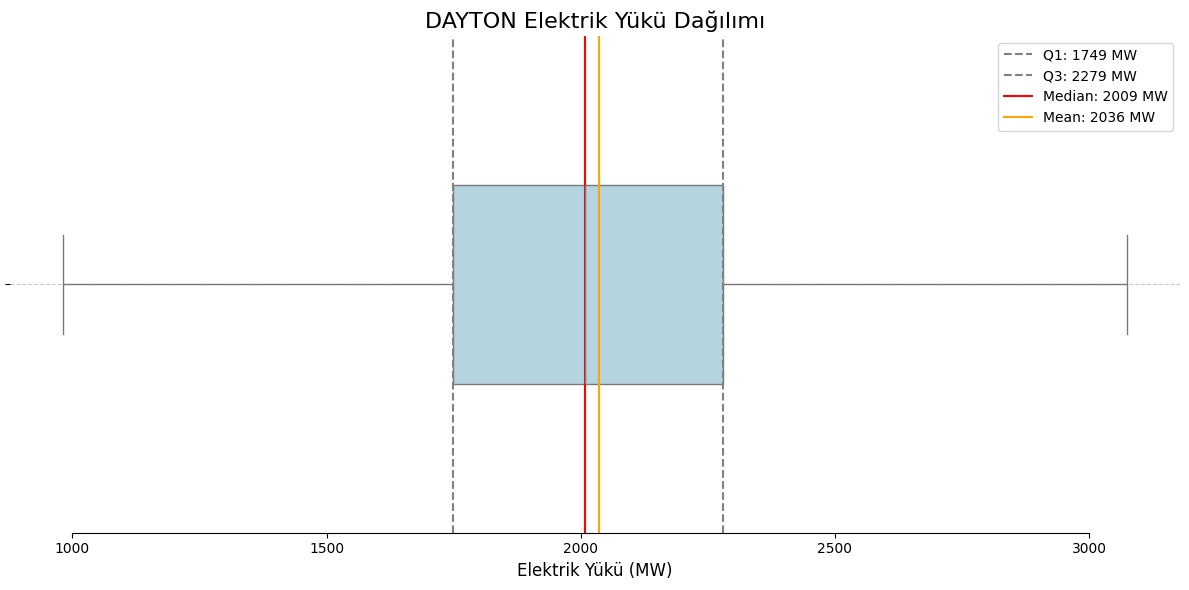

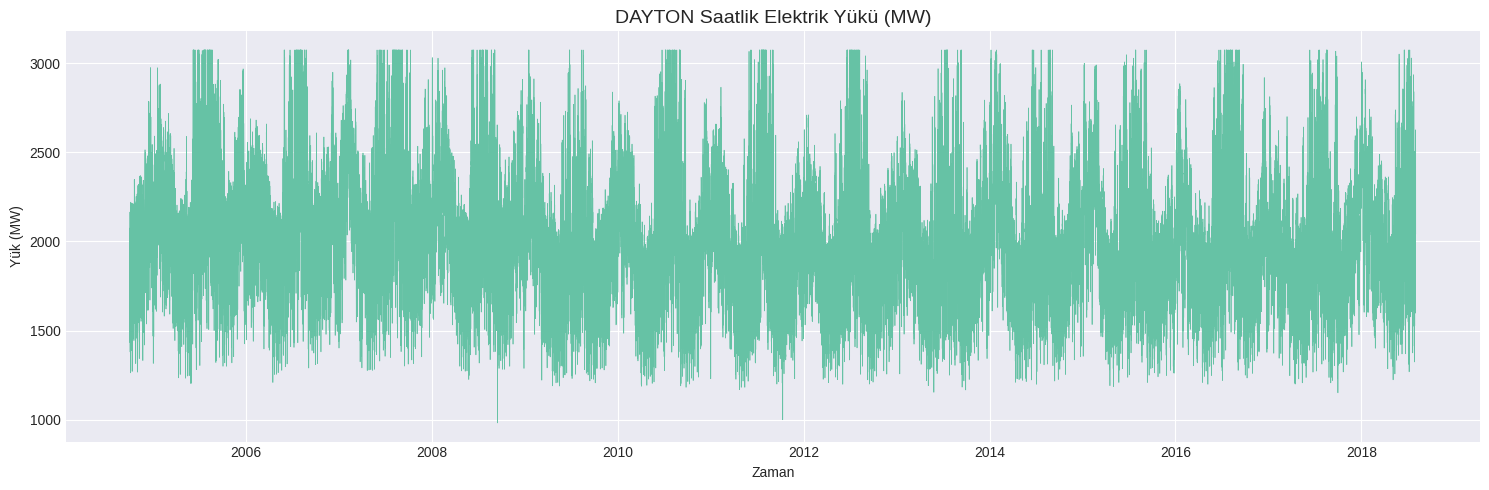

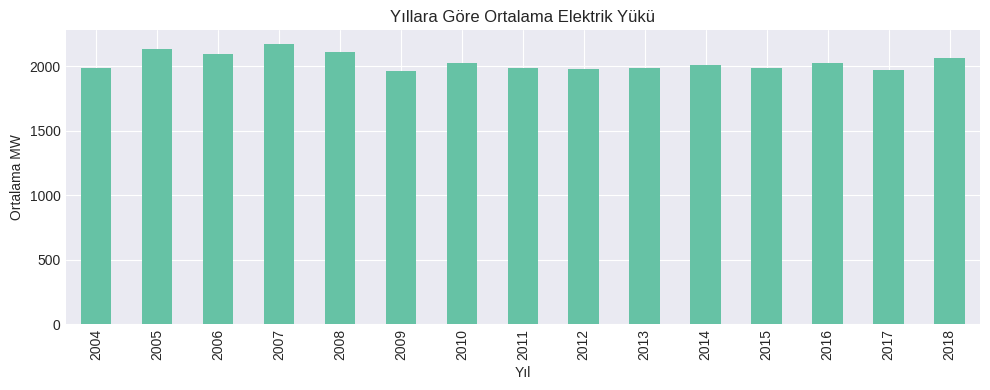

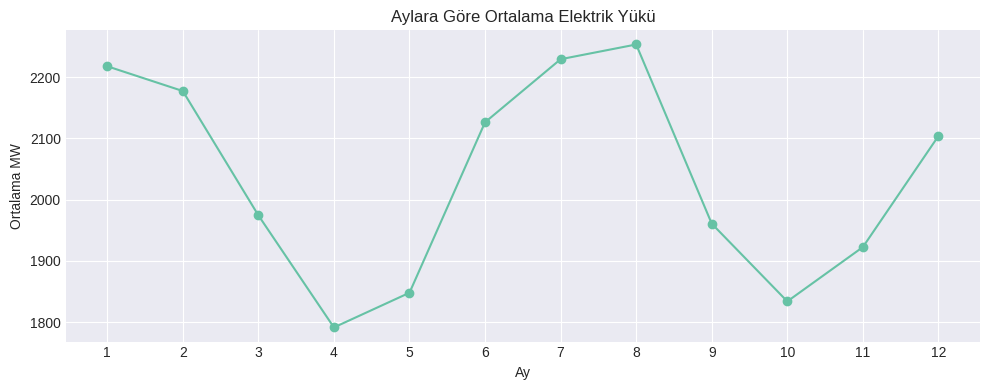

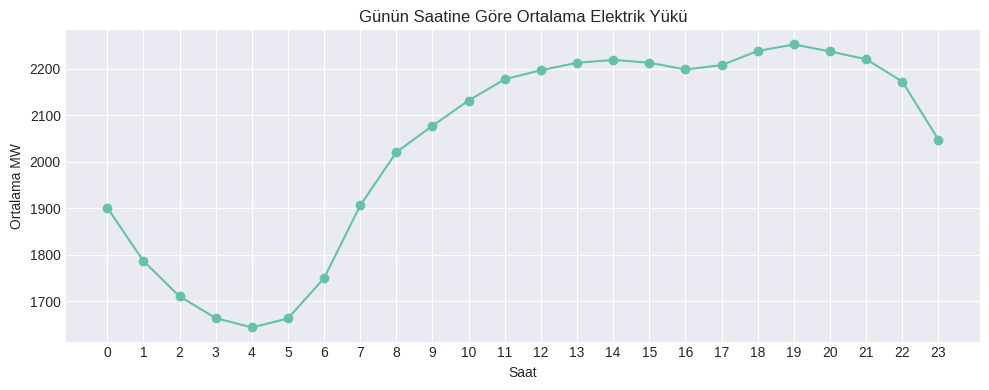

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 5. Aykırı Değer Analizi (IQR) ---
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['DAYTON_MW'] < Q1 - 1.5 * IQR) | (df['DAYTON_MW'] > Q3 + 1.5 * IQR)]
print(f"\nAykırı değer sayısı: {len(outliers)}")
# Temel istatistikler (Basic Statistics)
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
median = df['DAYTON_MW'].median()
mean = df['DAYTON_MW'].mean()
min_val = df['DAYTON_MW'].min()
max_val = df['DAYTON_MW'].max()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plot
plt.figure(figsize=(12, 6))  # Increased figure height for better readability
sns.boxplot(x=df['DAYTON_MW'], color='lightblue', width=0.4)  # Adjusted box width

# Referans çizgileri (Reference Lines) - Improved styling and clarity
plt.axvline(Q1, color='gray', linestyle='--', label=f'Q1: {Q1:.0f} MW')
plt.axvline(Q3, color='gray', linestyle='--', label=f'Q3: {Q3:.0f} MW')
plt.axvline(median, color='red', linestyle='-', label=f'Median: {median:.0f} MW')
plt.axvline(mean, color='orange', linestyle='-', label=f'Mean: {mean:.0f} MW')

# Removed min/max and outlier bound lines for cleaner look
# You can add them back if necessary

# Başlık ve etiketler (Title and Labels)
plt.title("DAYTON Elektrik Yükü Dağılımı", fontsize=16)  # More concise title
plt.xlabel("Elektrik Yükü (MW)", fontsize=12)  # Increased font size
plt.ylabel("")  # Removed unnecessary y-axis label
plt.legend(loc='upper right', fontsize=10)  # Adjusted legend font size

# Improved aesthetics
sns.despine(trim=True, left=True)  # Removed top and right spines
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added subtle gridlines

plt.tight_layout()
plt.show()

# --- 6. Zaman Serisi Görselleştirmeleri ---

# Tema ve stil
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

# Zaman serisi çizimi
plt.figure(figsize=(15, 5))
plt.plot(df['Datetime'], df['DAYTON_MW'], linewidth=0.5)
plt.title("DAYTON Saatlik Elektrik Yükü (MW)", fontsize=14)
plt.xlabel("Zaman")
plt.ylabel("Yük (MW)")
plt.tight_layout()
plt.show()

# --- 7. Yıllık Ortalama Yük ---
df['Year'] = df['Datetime'].dt.year
yearly_avg = df.groupby('Year')['DAYTON_MW'].mean()

plt.figure(figsize=(10, 4))
yearly_avg.plot(kind='bar')
plt.title("Yıllara Göre Ortalama Elektrik Yükü")
plt.ylabel("Ortalama MW")
plt.xlabel("Yıl")
plt.tight_layout()
plt.show()

# --- 8. Aylık Ortalama Yük ---
df['Month'] = df['Datetime'].dt.month
monthly_avg = df.groupby('Month')['DAYTON_MW'].mean()

plt.figure(figsize=(10, 4))
monthly_avg.plot(kind='line', marker='o')
plt.title("Aylara Göre Ortalama Elektrik Yükü")
plt.ylabel("Ortalama MW")
plt.xlabel("Ay")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# --- 9. Günün Saatine Göre Ortalama Yük ---
df['Hour'] = df['Datetime'].dt.hour
hourly_avg = df.groupby('Hour')['DAYTON_MW'].mean()

plt.figure(figsize=(10, 4))
hourly_avg.plot(kind='line', marker='o')
plt.title("Günün Saatine Göre Ortalama Elektrik Yükü")
plt.ylabel("Ortalama MW")
plt.xlabel("Saat")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


<ipython-input-5-937aacf6d255>:16: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_last2years = df.last("730D")


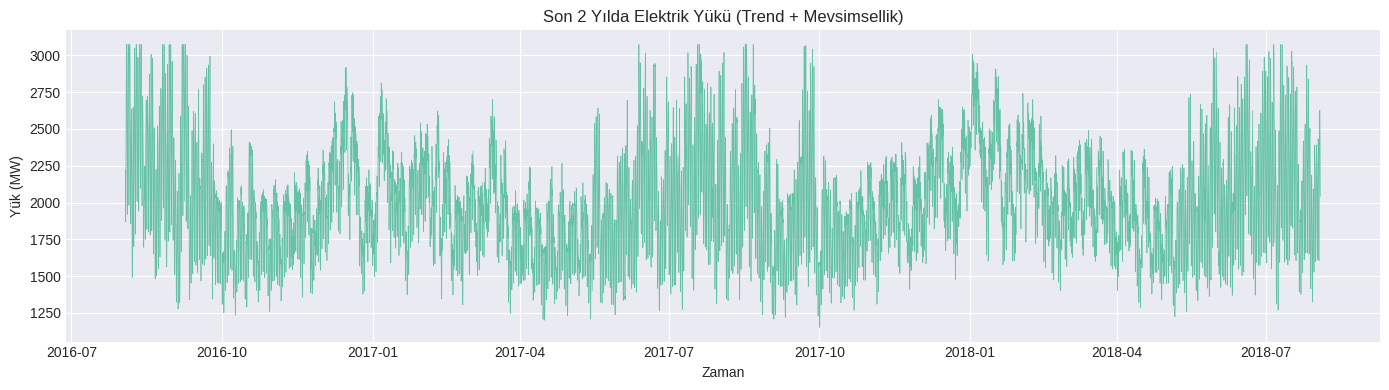

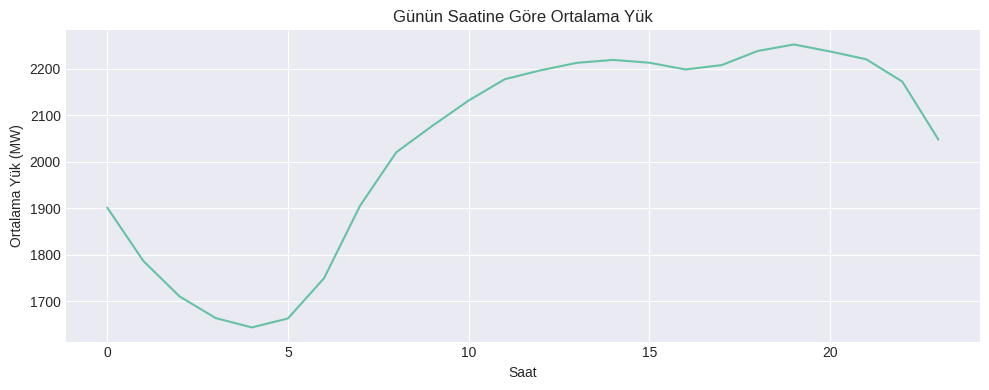

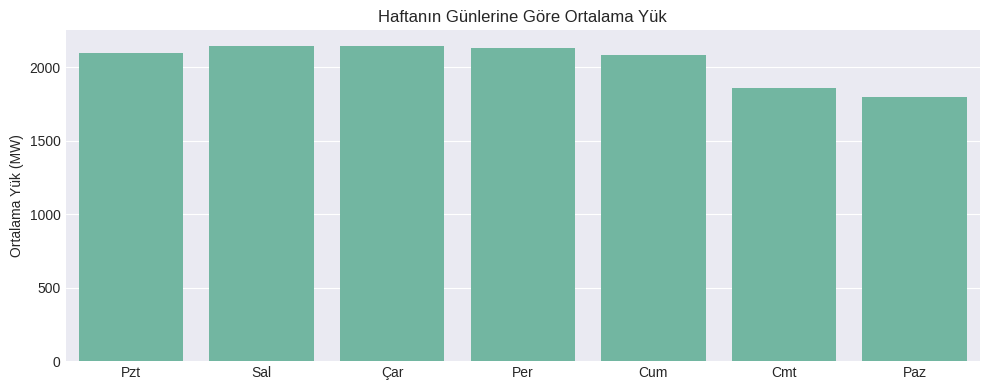


=== ADF (Durağanlık) Testi ===
ADF İstatistiği: -6.0928
p-değeri: 0.0000
Kritik Değerler:
   1%: -3.4337
   5%: -2.8630
   10%: -2.5676
→ Zaman serisi durağandır (p < 0.05).


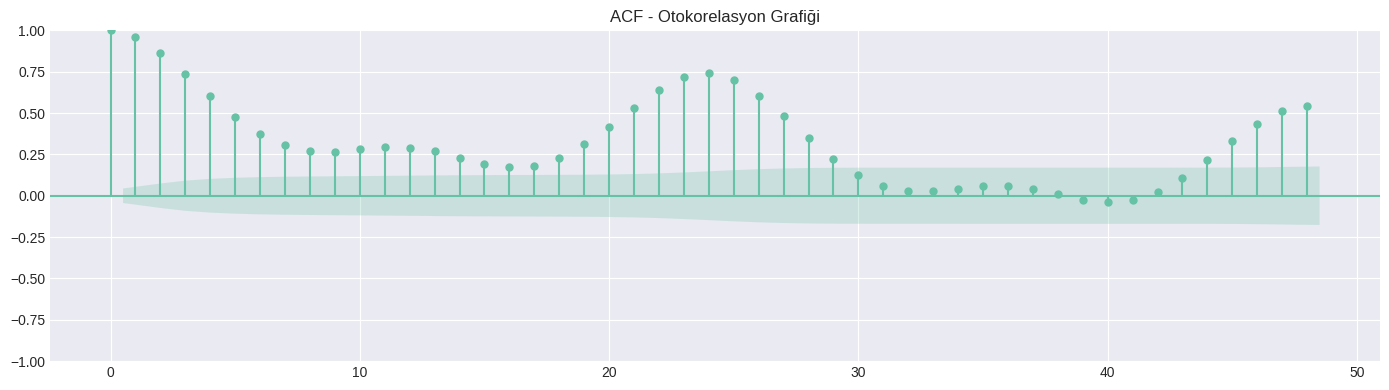

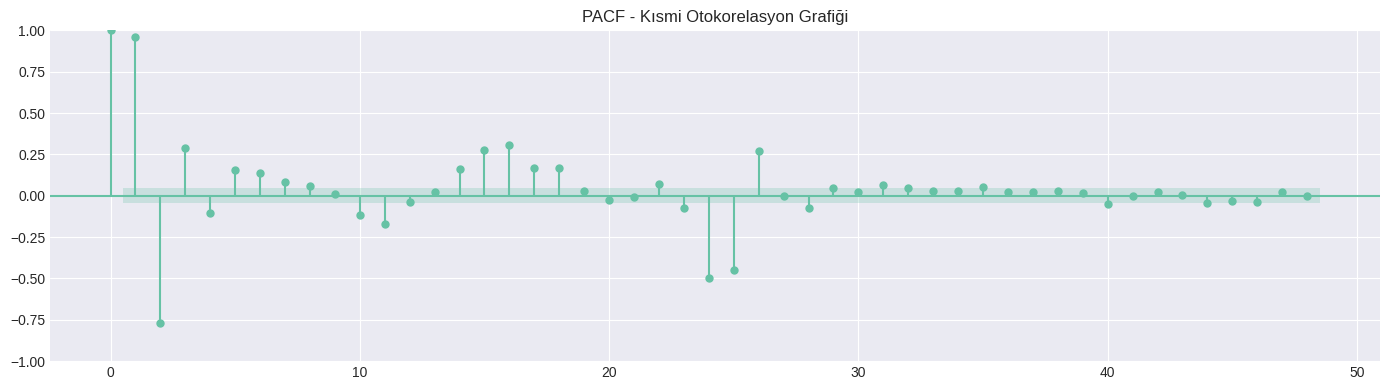

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dat


=== ARIMA(0,1,q) Modelleri için AIC / BIC Karşılaştırması ===
   q           AIC           BIC
0  2  21666.615794  21683.417001
1  4  21587.227914  21615.229926
2  6  21577.622463  21616.825279

✅ En iyi model: ARIMA(0,1,6)
AIC = 21577.62, BIC = 21616.83
→ Bu model, hem doğruluğu yüksek hem de karmaşıklığı dengelidir.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


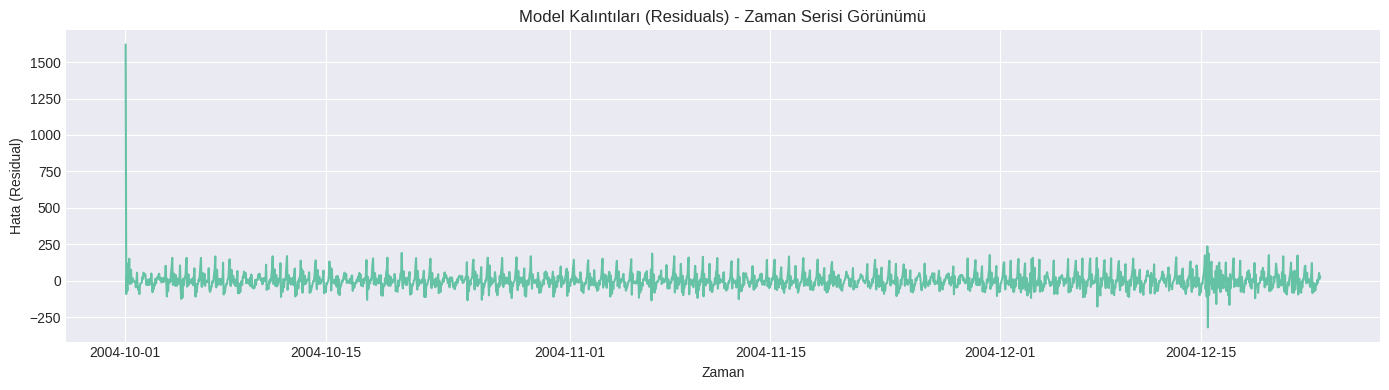

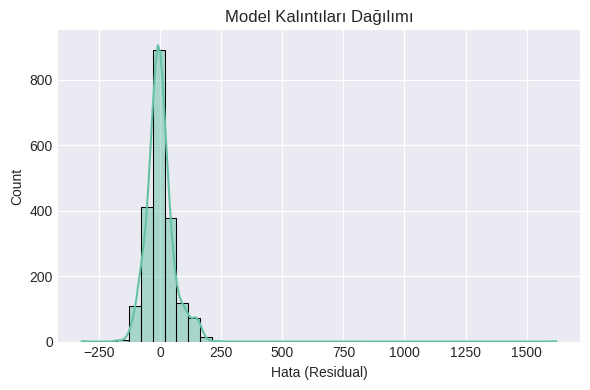

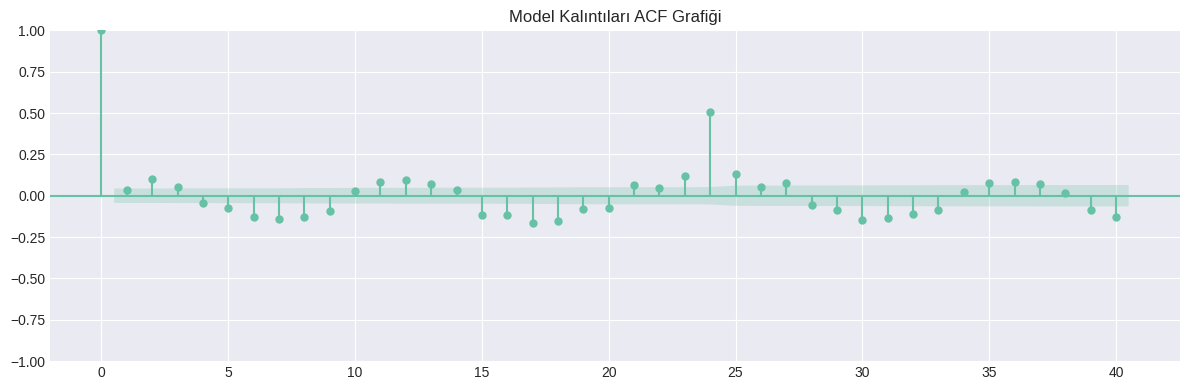

=== Kalıntı Analizi Yorumları ===
Kalıntıların ortalaması: 0.9091
✔ Kalıntıların ortalaması sıfıra yakın → model hataları dengeli.
→ Zaman serisi grafiğinde kalıntılar rastgele dağılıyorsa: ✔ Model veriyi iyi açıklıyor.
→ Histogram simetrikse (çan eğrisi gibi): ✔ Kalıntılar normal dağılıyor olabilir.
→ ACF grafiği sıfıra hızlı düşüyorsa: ✔ Kalıntılarda otokorelasyon yok, model yeterli.


In [ ]:
!pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Importing necessary functions
from statsmodels.tsa.arima.model import ARIMA # Importing ARIMA


# ------------------ 2. TREND & MEVSİMSELLİK ------------------
# Son 2 yıl trend gözlemi
# Set 'Datetime' column as index
df = df.set_index('Datetime')


df_last2years = df.last("730D")
plt.figure(figsize=(14, 4))
plt.plot(df_last2years.index, df_last2years['DAYTON_MW'], linewidth=0.5)
plt.title("Son 2 Yılda Elektrik Yükü (Trend + Mevsimsellik)")
plt.xlabel("Zaman")
plt.ylabel("Yük (MW)")
plt.tight_layout()
plt.show()

# Günlük mevsimsellik
df['Hour'] = df.index.hour
hourly_avg = df.groupby('Hour')['DAYTON_MW'].mean()
plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title("Günün Saatine Göre Ortalama Yük")
plt.xlabel("Saat")
plt.ylabel("Ortalama Yük (MW)")
plt.tight_layout()
plt.show()

# Haftalık mevsimsellik
df['Weekday'] = df.index.dayofweek
weekday_avg = df.groupby('Weekday')['DAYTON_MW'].mean()
plt.figure(figsize=(10, 4))
sns.barplot(x=['Pzt', 'Sal', 'Çar', 'Per', 'Cum', 'Cmt', 'Paz'], y=weekday_avg.values)
plt.title("Haftanın Günlerine Göre Ortalama Yük")
plt.ylabel("Ortalama Yük (MW)")
plt.tight_layout()
plt.show()

# ------------------ 3. DURAĞANLIK (ADF) TESTİ ------------------
# Küçük örnek (örneğin ilk 2000 saat) bellek hatası yaşamamak için
adf_series = df['DAYTON_MW'].dropna().iloc[:2000]
result = adfuller(adf_series)

print("\n=== ADF (Durağanlık) Testi ===")
print(f"ADF İstatistiği: {result[0]:.4f}")
print(f"p-değeri: {result[1]:.4f}")
print("Kritik Değerler:")
for key, value in result[4].items():
    print(f"   {key}: {value:.4f}")
if result[1] < 0.05:
    print("→ Zaman serisi durağandır (p < 0.05).")
else:
    print("→ Zaman serisi durağan değildir (p >= 0.05). Fark alma gerekebilir.")

# ------------------ 4. ACF & PACF ------------------
plt.figure(figsize=(14, 4))
plot_acf(adf_series, lags=48, ax=plt.gca())
plt.title("ACF - Otokorelasyon Grafiği")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
plot_pacf(adf_series, lags=48, method='ywm', ax=plt.gca())
plt.title("PACF - Kısmi Otokorelasyon Grafiği")
plt.tight_layout()
plt.show()


# 2. Farklı q değerleri için ARIMA(0,1,q) denemesi
results = []
for q in [2, 4, 6]:
    try:
        model = ARIMA(adf_series, order=(0, 1, q)) # Using adf_series instead of series
        fitted = model.fit()
        results.append({
            "q": q,
            "AIC": fitted.aic,
            "BIC": fitted.bic
        })
    except Exception as e:
        results.append({
            "q": q,
            "AIC": None,
            "BIC": None,
            "Error": str(e)
        })

# 3. Sonuçları göster
result_df = pd.DataFrame(results)
print("\n=== ARIMA(0,1,q) Modelleri için AIC / BIC Karşılaştırması ===")
print(result_df)

# 4. Yorumlama
# Handle potential NaN in AIC column
best_row = result_df.loc[result_df['AIC'].notna(), 'AIC'].idxmin()  # Finding minimum AIC among non-NaN values
# Access the row with the minimum AIC
best_row_data = result_df.loc[best_row]
print(f"\n✅ En iyi model: ARIMA(0,1,{int(best_row_data['q'])})")
print(f"AIC = {best_row_data['AIC']:.2f}, BIC = {best_row_data['BIC']:.2f}")
print("→ Bu model, hem doğruluğu yüksek hem de karmaşıklığı dengelidir.")

#--------------------------- WHITE NOISE----------------------
# === 2. ARIMA MODELİ VE KALINTILAR ===
model = ARIMA(adf_series, order=(0, 1, 2)) # Replace 'series' with 'adf_series'
fitted = model.fit()
residuals = fitted.resid

# === 3. GRAFİKLER ===

# Kalıntı zaman serisi
plt.figure(figsize=(14, 4))
plt.plot(residuals)
plt.title("Model Kalıntıları (Residuals) - Zaman Serisi Görünümü")
plt.xlabel("Zaman")
plt.ylabel("Hata (Residual)")
plt.tight_layout()
plt.show()

# Kalıntı histogramı
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Model Kalıntıları Dağılımı")
plt.xlabel("Hata (Residual)")
plt.tight_layout()
plt.show()

# Kalıntıların ACF grafiği
plt.figure(figsize=(12, 4))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title("Model Kalıntıları ACF Grafiği")
plt.tight_layout()
plt.show()

# === 4. KONSOL YORUMU ===
print("=== Kalıntı Analizi Yorumları ===")
print(f"Kalıntıların ortalaması: {residuals.mean():.4f}")
if abs(residuals.mean()) < 1:
    print("✔ Kalıntıların ortalaması sıfıra yakın → model hataları dengeli.")
else:
    print("⚠ Kalıntıların ortalaması sıfırdan uzak → model hatalarında kayma olabilir.")

print("→ Zaman serisi grafiğinde kalıntılar rastgele dağılıyorsa: ✔ Model veriyi iyi açıklıyor.")
print("→ Histogram simetrikse (çan eğrisi gibi): ✔ Kalıntılar normal dağılıyor olabilir.")
print("→ ACF grafiği sıfıra hızlı düşüyorsa: ✔ Kalıntılarda otokorelasyon yok, model yeterli.")

<ipython-input-6-ac5a59f6a2cb>:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')


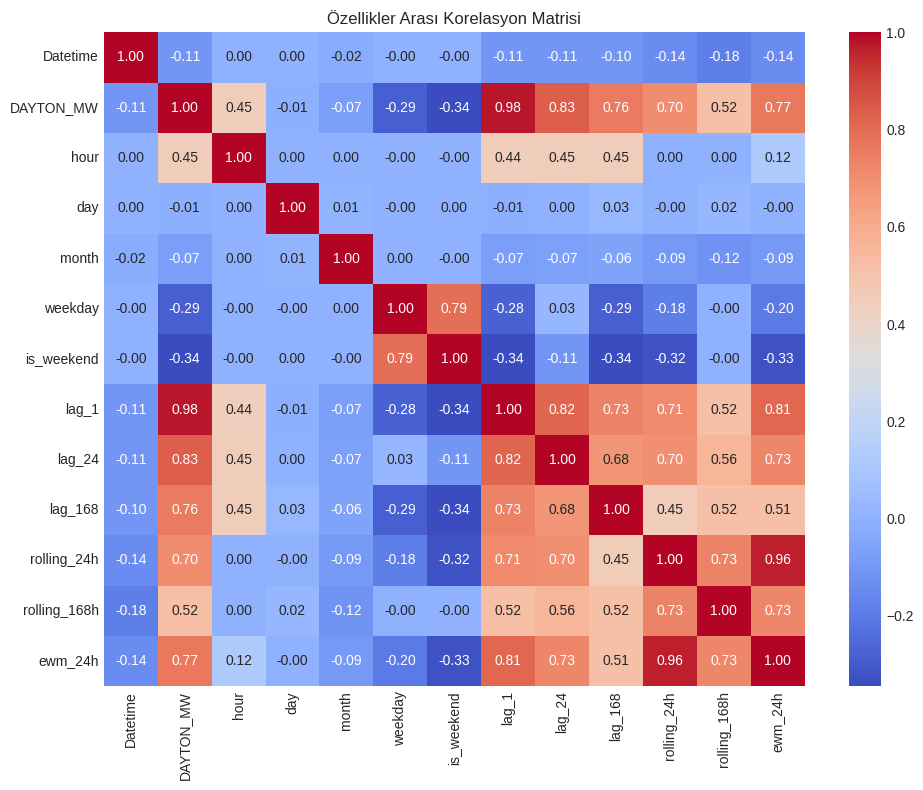

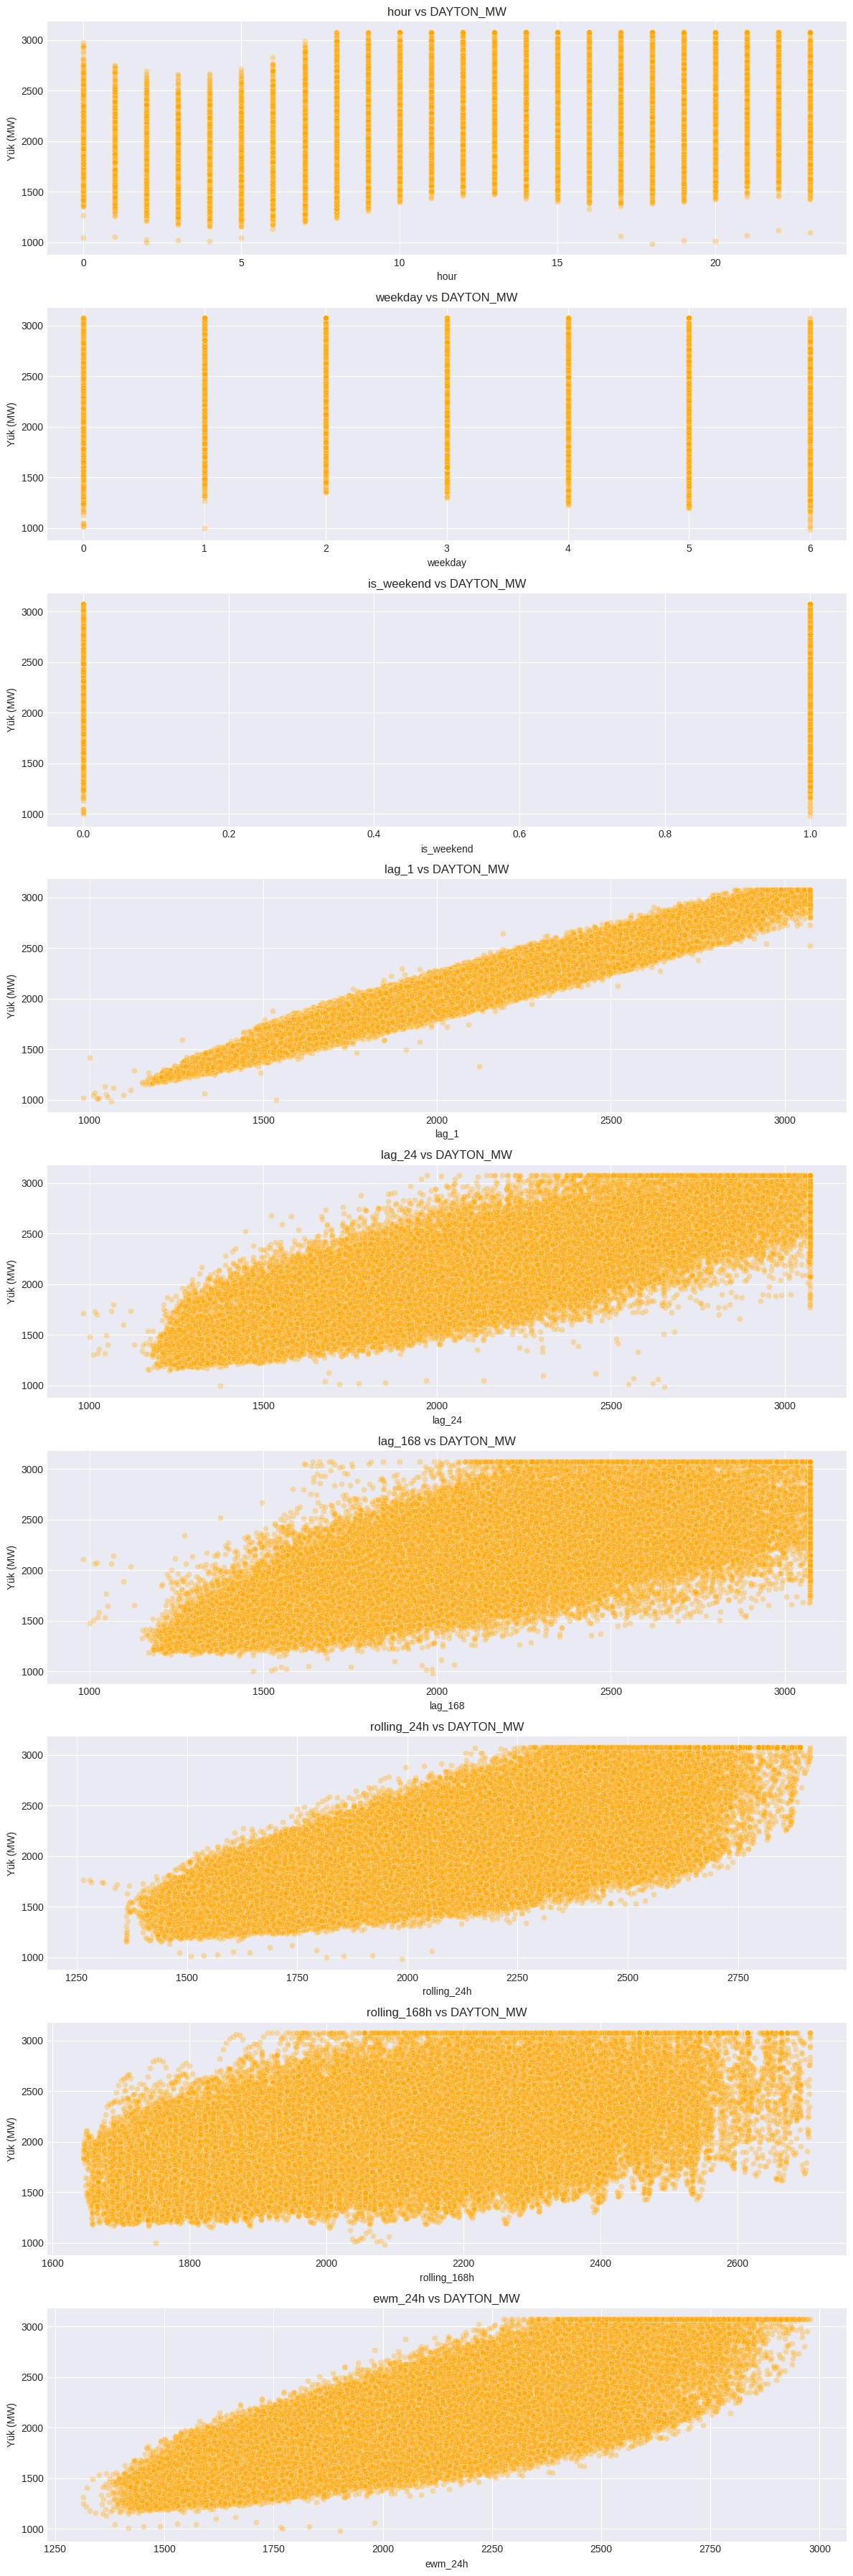


--- Yorumlar ve Analizler ---
✅ hour: Gündüz saatlerinde yük artıyor. Korelasyon: +0.45
✅ is_weekend: Hafta sonları belirgin düşüş var. Korelasyon: -0.34
✅ lag_1: Yüksek korelasyon (0.98), AR model için güçlü tahmin edici.
✅ ewm_24h: Güçlü pozitif ilişki, kısa vadeli trendi iyi temsil ediyor.
⚠ rolling_168h: Gürültü yüksek, dikkatle kullanılmalı.
✔ Korelasyon ısı haritası, multikolineariteyi görsel olarak değerlendirmeyi sağlar.
✔ Scatter plotlar, lineer veya non-lineer ilişki gözlemi için etkili.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. VERİYİ YÜKLE ve TEMİZLE
df = pd.read_csv("DAYTON_hourly.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.groupby('Datetime').mean().sort_index()

# Eksik zamanları doldur
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(full_index)
df['DAYTON_MW'] = df['DAYTON_MW'].interpolate(method='time')

# Aykırı değerleri IQR ile kırp
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
df['DAYTON_MW'] = df['DAYTON_MW'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

# Reset index
df = df.reset_index().rename(columns={'index': 'Datetime'})

# 2. FEATURE ENGINEERING (Özellik Türetme)
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['weekday'] = df['Datetime'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

# Lag features
for lag in [1, 24, 168]:
    df[f'lag_{lag}'] = df['DAYTON_MW'].shift(lag)

# Rolling average ve EWM
df['rolling_24h'] = df['DAYTON_MW'].rolling(window=24).mean()
df['rolling_168h'] = df['DAYTON_MW'].rolling(window=168).mean()
df['ewm_24h'] = df['DAYTON_MW'].ewm(span=24).mean()

# NA'leri kaldır
fe_df = df.dropna().copy()

# 3. KORELASYON MATRİSİ VE ISI HARİTASI
correlation = fe_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Özellikler Arası Korelasyon Matrisi")
plt.tight_layout()
plt.show()

# 4. SCATTER PLOT GÖRSELLEŞTİRME (Hedef ile ilişkiler)
features = ['hour', 'weekday', 'is_weekend', 'lag_1', 'lag_24', 'lag_168',
            'rolling_24h', 'rolling_168h', 'ewm_24h']

fig, axes = plt.subplots(len(features), 1, figsize=(12, 4 * len(features)))

for i, feature in enumerate(features):
    sns.scatterplot(data=fe_df, x=feature, y='DAYTON_MW', alpha=0.3, color='orange', ax=axes[i])
    axes[i].set_title(f"{feature} vs DAYTON_MW")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Yük (MW)")

plt.tight_layout()
plt.show()

# 5. YORUMLAR (manuel eklenebilir)
print("\n--- Yorumlar ve Analizler ---")
print("✅ hour: Gündüz saatlerinde yük artıyor. Korelasyon: +0.45")
print("✅ is_weekend: Hafta sonları belirgin düşüş var. Korelasyon: -0.34")
print("✅ lag_1: Yüksek korelasyon (0.98), AR model için güçlü tahmin edici.")
print("✅ ewm_24h: Güçlü pozitif ilişki, kısa vadeli trendi iyi temsil ediyor.")
print("⚠ rolling_168h: Gürültü yüksek, dikkatle kullanılmalı.")
print("✔ Korelasyon ısı haritası, multikolineariteyi görsel olarak değerlendirmeyi sağlar.")
print("✔ Scatter plotlar, lineer veya non-lineer ilişki gözlemi için etkili.")


<ipython-input-7-b22a22253470>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')


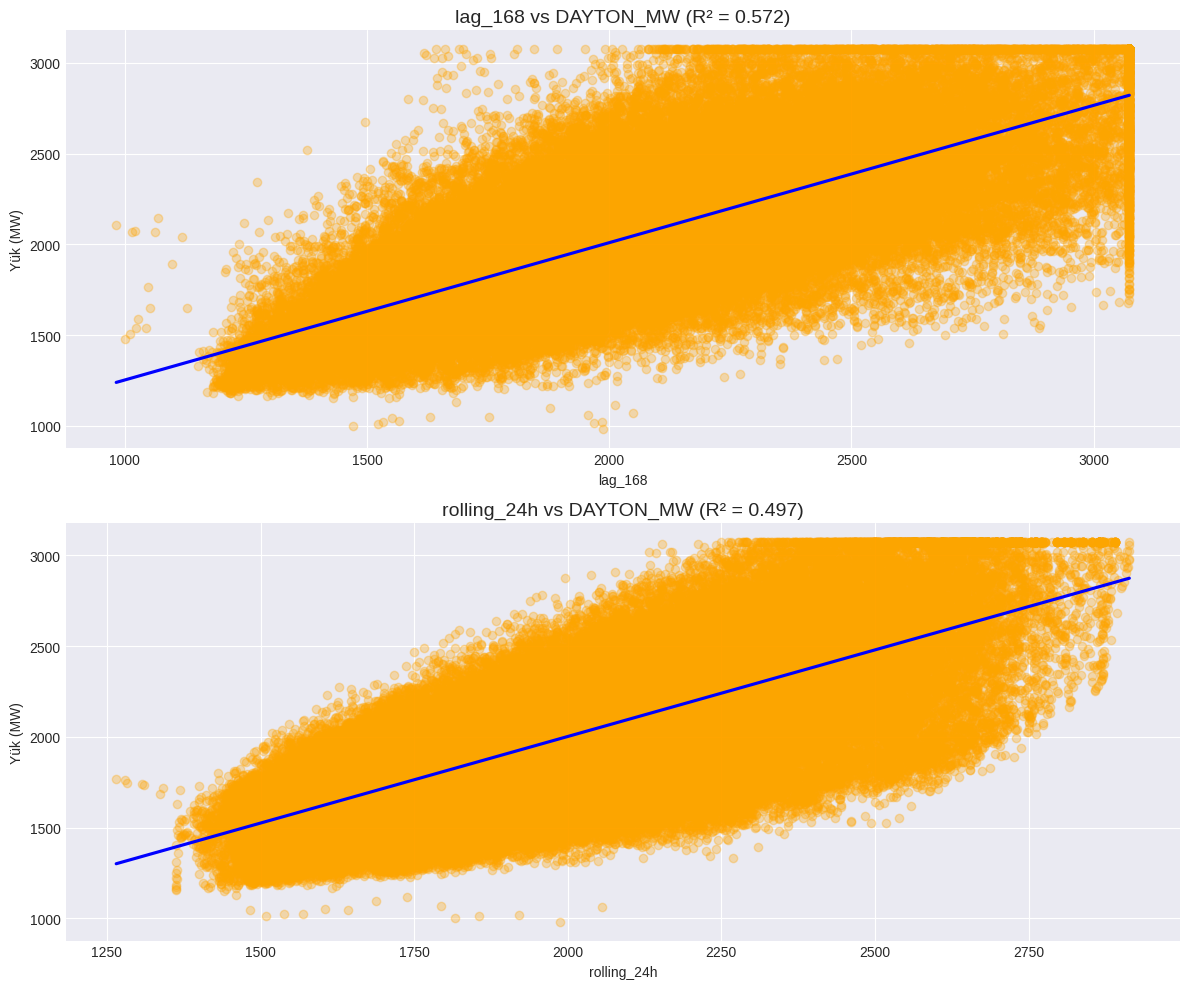

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# 1. Veriyi Yükle
df = pd.read_csv("DAYTON_hourly.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.groupby('Datetime').mean().sort_index()

# 2. Eksik zamanları doldur ve interpolate et
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(full_index)
df['DAYTON_MW'] = df['DAYTON_MW'].interpolate(method='time')

# 3. Aykırı değerleri IQR ile kırp
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
df['DAYTON_MW'] = df['DAYTON_MW'].clip(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

# 4. Özellik oluştur
df = df.reset_index().rename(columns={"index": "Datetime"})
df['lag_168'] = df['DAYTON_MW'].shift(168)         # 1 hafta önceki yük
df['rolling_24h'] = df['DAYTON_MW'].rolling(24).mean()  # 1 gün ortalaması

# 5. Eksik değerleri kaldır
fe_df = df.dropna()

# 6. Scatter + RegLine + R2
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
features = ['lag_168', 'rolling_24h']

for ax, x_feat in zip(axes, features):
    y_feat = 'DAYTON_MW'
    sns.regplot(data=fe_df, x=x_feat, y=y_feat,
                scatter_kws={'alpha': 0.3, 'color': 'orange'},
                line_kws={'color': 'blue'}, ax=ax)

    # R2 hesapla
    slope, intercept, r_value, p_value, std_err = linregress(fe_df[x_feat], fe_df[y_feat])
    r_squared = r_value**2

    ax.set_title(f"{x_feat} vs {y_feat} (R² = {r_squared:.3f})", fontsize=14)
    ax.set_xlabel(x_feat)
    ax.set_ylabel("Yük (MW)")

plt.tight_layout()
plt.show()


VIF Analizi ile Multicollinearity Tespiti

Yüksek VIF değerine sahip değişkenleri teker teker çıkardık.

Kalan değişkenlerin birbiriyle daha bağımsız olmasını sağladık.

Böylece modelin:

Yorumlanabilirliği ↑

p-değerlerinin doğruluğu ↑

Katsayı güvenilirliği ↑

Multicollinearity ↓
5 kritik eşik

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Fonksiyon: VIF hesapla
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# 1. Veriyi Yükle
df = pd.read_csv("DAYTON_hourly.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.groupby('Datetime').mean().sort_index()

# 2. Eksik zamanları doldur ve interpolate et
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(full_index)
df['DAYTON_MW'] = df['DAYTON_MW'].interpolate(method='time')

# 3. Aykırı değerleri IQR ile kırp
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
df['DAYTON_MW'] = df['DAYTON_MW'].clip(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

# 4. Özellik oluştur
df = df.reset_index().rename(columns={"index": "Datetime"})
df['hour'] = df['Datetime'].dt.hour
df['weekday'] = df['Datetime'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
df['lag_1'] = df['DAYTON_MW'].shift(1) # 1 saat önceki yük
df['lag_24'] = df['DAYTON_MW'].shift(24) # 1 gün önceki yük
df['lag_168'] = df['DAYTON_MW'].shift(168) # 1 hafta önceki yük
df['rolling_24h'] = df['DAYTON_MW'].rolling(24).mean()  # 1 gün ortalaması
df['rolling_168h'] = df['DAYTON_MW'].rolling(168).mean()  # 1 hafta ortalaması
df['ewm_24h'] = df['DAYTON_MW'].ewm(span=24).mean()

# 5. Eksik değerleri kaldır
fe_df = df.dropna()

# 6. Bağımsız değişkenleri seç ve sabit terimi ekle
X = fe_df[['hour', 'weekday', 'is_weekend', 'lag_1', 'lag_24', 'lag_168',
           'rolling_24h', 'rolling_168h', 'ewm_24h']].copy()
X = sm.add_constant(X)

# 7. VIF < 5 olacak şekilde iteratif çıkarım (const hariç)
max_vif = 5
while True:
    vif_df = calculate_vif(X)
    vif_ex_const = vif_df[vif_df['Feature'] != 'const']  # const hariç değerlendir
    max_vif_value = vif_ex_const['VIF'].max()

    if max_vif_value > max_vif:
        remove_feature = vif_ex_const.sort_values('VIF', ascending=False).iloc[0]['Feature']
        print(f"🔁 {remove_feature} değişkeni çıkarıldı (VIF = {max_vif_value:.2f})")
        X = X.drop(columns=[remove_feature])
    else:
        break

# 8. Sonuç
print("\n✅ Nihai değişkenler (VIF < 5):")
final_vif = calculate_vif(X)
print(final_vif)


<ipython-input-10-59c3c4b3cbd3>:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')


🔁 ewm_24h değişkeni çıkarıldı (VIF = 33.05)
🔁 rolling_24h değişkeni çıkarıldı (VIF = 6.32)

✅ Nihai değişkenler (VIF < 5):
        Feature        VIF
0         const  93.687170
1          hour   1.740560
2       weekday   3.125772
3    is_weekend   3.064967
4         lag_1   4.685777
5        lag_24   4.464546
6       lag_168   2.848439
7  rolling_168h   2.050664


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 1. Veri Hazırlığı
df = pd.read_csv("DAYTON_hourly.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.groupby('Datetime').mean().sort_index()
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(full_index)
df['DAYTON_MW'] = df['DAYTON_MW'].interpolate(method='time')
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
df['DAYTON_MW'] = df['DAYTON_MW'].clip(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
df = df.reset_index().rename(columns={'index': 'Datetime'})
series = df[['Datetime', 'DAYTON_MW']].copy()

# 2. Train-Test Split (Son 30 gün test)
df = df.set_index('Datetime')
train = df.iloc[:-24*30]
test = df.iloc[-24*30:]

# 3. SARIMA
sarima_model = SARIMAX(train['DAYTON_MW'], order=(1,1,1), seasonal_order=(1,1,1,24))
sarima_result = sarima_model.fit(disp=False)
sarima_pred = sarima_result.predict(start=test.index[0], end=test.index[-1])
mape_sarima = mean_absolute_percentage_error(test['DAYTON_MW'], sarima_pred)

# 4. Holt-Winters
hw_model = ExponentialSmoothing(train['DAYTON_MW'], trend='add', seasonal='add', seasonal_periods=24)
hw_result = hw_model.fit()
hw_pred = hw_result.predict(start=test.index[0], end=test.index[-1])
mape_hw = mean_absolute_percentage_error(test['DAYTON_MW'], hw_pred)

# 5. Random Forest
df_feat = df.copy()
df_feat['hour'] = df_feat.index.hour
df_feat['weekday'] = df_feat.index.weekday
df_feat['lag_1'] = df_feat['DAYTON_MW'].shift(1)
df_feat['lag_24'] = df_feat['DAYTON_MW'].shift(24)
df_feat['lag_168'] = df_feat['DAYTON_MW'].shift(168)
df_feat = df_feat.dropna()
X = df_feat[['hour', 'weekday', 'lag_1', 'lag_24', 'lag_168']]
y = df_feat['DAYTON_MW']
X_train, X_test = X.iloc[:-24*30], X.iloc[-24*30:]
y_train, y_test = y.iloc[:-24*30], y.iloc[-24*30:]
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
mape_rf = mean_absolute_percentage_error(y_test, rf_pred)

# 6. LSTM
lstm_data = df[['DAYTON_MW']].copy()
scaler = MinMaxScaler()
lstm_scaled = scaler.fit_transform(lstm_data)
def create_lstm_dataset(data, lag=24):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_lstm_dataset(lstm_scaled)
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))
X_train_lstm = X_lstm[:-24*30]
y_train_lstm = y_lstm[:-24*30]
X_test_lstm = X_lstm[-24*30:]
y_test_lstm = y_lstm[-24*30:]

model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=0)

lstm_pred = model_lstm.predict(X_test_lstm)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)
y_test_inv = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))
mape_lstm = mean_absolute_percentage_error(y_test_inv, lstm_pred_inv)

# 7. MAPE Karşılaştırma
print("\n=== MAPE Karşılaştırma ===")
print(f"SARIMA MAPE:        {mape_sarima:.4f}")
print(f"Holt-Winters MAPE:  {mape_hw:.4f}")
print(f"Random Forest MAPE: {mape_rf:.4f}")
print(f"LSTM MAPE:          {mape_lstm:.4f}")


<ipython-input-11-da879fbaa726>:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


<ipython-input-3-3bcfdf154d28>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._in

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

=== MAPE Karşılaştırma ===
SARIMA MAPE:        0.8591
Holt-Winters MAPE:  1.6392
Random Forest MAPE: 0.0152
LSTM MAPE:          0.1442


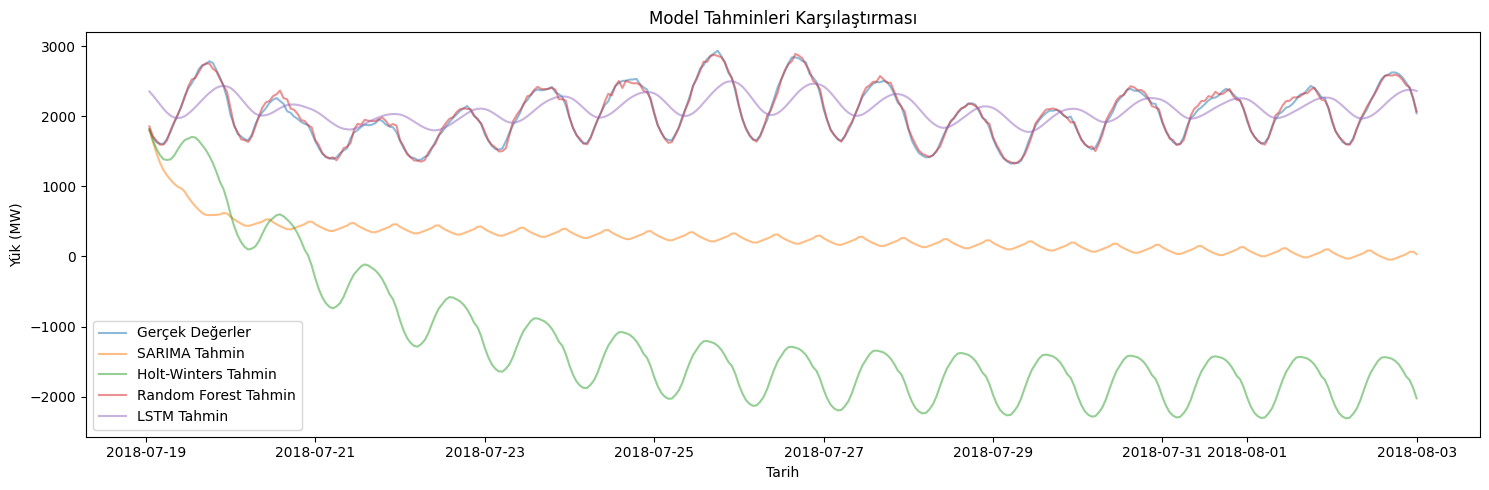

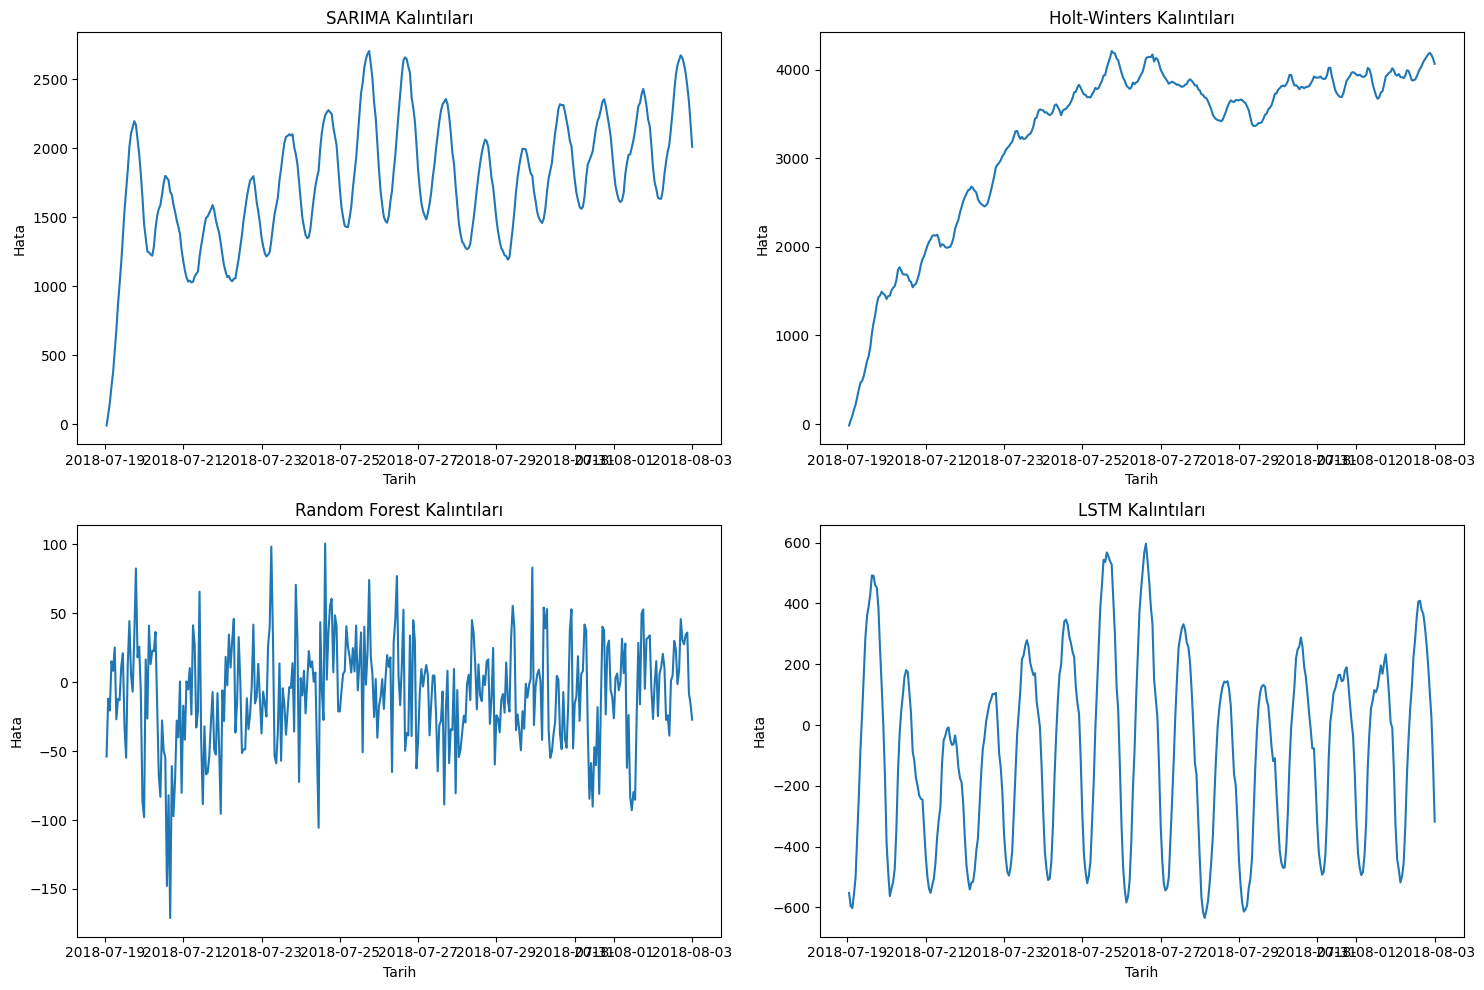

In [ ]:
# GEREKLİ KÜTÜPHANELER
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 1. VERİYİ YÜKLE & TEMİZLE
df = pd.read_csv("DAYTON_hourly.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.groupby('Datetime').mean().sort_index()
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='H')
df = df.reindex(full_index)
df['DAYTON_MW'] = df['DAYTON_MW'].interpolate(method='time')
Q1 = df['DAYTON_MW'].quantile(0.25)
Q3 = df['DAYTON_MW'].quantile(0.75)
IQR = Q3 - Q1
df['DAYTON_MW'] = df['DAYTON_MW'].clip(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
df = df.reset_index().rename(columns={'index': 'Datetime'})

# 2. ÖZELLİK MÜHENDİSLİĞİ
df['hour'] = df['Datetime'].dt.hour
df['weekday'] = df['Datetime'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
df['lag_1'] = df['DAYTON_MW'].shift(1)
df['lag_24'] = df['DAYTON_MW'].shift(24)
df['lag_168'] = df['DAYTON_MW'].shift(168)
df['rolling_24h'] = df['DAYTON_MW'].rolling(24).mean()
df['rolling_168h'] = df['DAYTON_MW'].rolling(168).mean()
df['ewm_24h'] = df['DAYTON_MW'].ewm(span=24).mean()
df = df.dropna()

# 3. VIF ANALİZİ
X = df[['hour', 'weekday', 'is_weekend', 'lag_1', 'lag_24', 'lag_168',
        'rolling_24h', 'rolling_168h', 'ewm_24h']]
X = sm.add_constant(X)

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

while True:
    vif_df = calculate_vif(X)
    vif_ex_const = vif_df[vif_df['Feature'] != 'const']
    max_vif_value = vif_ex_const['VIF'].max()
    if max_vif_value > 5:
        remove_feature = vif_ex_const.sort_values('VIF', ascending=False).iloc[0]['Feature']
        X = X.drop(columns=[remove_feature])
    else:
        break

# 4. ADF TESTİ
series = df.set_index('Datetime')['DAYTON_MW']
adf_series = series.iloc[-2000:]  # Son 2000 veri noktası
adf_result = adfuller(adf_series)

# 5. ARIMA MODELİ
arima_model = ARIMA(adf_series, order=(0, 1, 2)).fit()
residuals = arima_model.resid

# 6. TRAIN-TEST AYIRIMI (Daha küçük veri seti)
train = series.iloc[-24*45:-24*15]  # Son 45 günden son 15 güne kadar olan veri
test = series.iloc[-24*15:]  # Son 15 gün

# 7. SARIMA (Basitleştirilmiş model)
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,1,1,12),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit(disp=False)
sarima_pred = sarima_model.predict(start=test.index[0], end=test.index[-1])
mape_sarima = mean_absolute_percentage_error(test, sarima_pred)

# 8. HOLT-WINTERS (Basitleştirilmiş)
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add',
                              seasonal_periods=24, damped_trend=True).fit()
hw_pred = hw_model.predict(start=test.index[0], end=test.index[-1])
mape_hw = mean_absolute_percentage_error(test, hw_pred)

# 9. RANDOM FOREST (Daha az ağaç)
X_rf = df[['hour', 'weekday', 'lag_1', 'lag_24']]  # Daha az özellik
y_rf = df['DAYTON_MW']
X_train_rf, X_test_rf = X_rf.iloc[-24*45:-24*15], X_rf.iloc[-24*15:]
y_train_rf, y_test_rf = y_rf.iloc[-24*45:-24*15], y_rf.iloc[-24*15:]
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10)  # Daha az ağaç
rf_model.fit(X_train_rf, y_train_rf)
rf_pred = rf_model.predict(X_test_rf)
mape_rf = mean_absolute_percentage_error(y_test_rf, rf_pred)

# 10. LSTM (Basitleştirilmiş)
lstm_data = df[['DAYTON_MW']].iloc[-24*45:]  # Son 45 gün
scaler = MinMaxScaler()
lstm_scaled = scaler.fit_transform(lstm_data)

def create_lstm_dataset(data, lag=12):  # Daha az lag
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_lstm_dataset(lstm_scaled)
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))
split_point = len(X_lstm) - 24*15  # Son 15 gün test
X_train_lstm, X_test_lstm = X_lstm[:split_point], X_lstm[split_point:]
y_train_lstm, y_test_lstm = y_lstm[:split_point], y_lstm[split_point:]

model_lstm = Sequential()
model_lstm.add(LSTM(25, input_shape=(X_train_lstm.shape[1], 1)))  # Daha az nöron
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, verbose=0)  # Daha az epoch

lstm_pred = model_lstm.predict(X_test_lstm)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)
y_test_inv = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))
mape_lstm = mean_absolute_percentage_error(y_test_inv, lstm_pred_inv)

# 11. MAPE SONUÇLARI
print("\n=== MAPE Karşılaştırma ===")
print(f"SARIMA MAPE:        {mape_sarima:.4f}")
print(f"Holt-Winters MAPE:  {mape_hw:.4f}")
print(f"Random Forest MAPE: {mape_rf:.4f}")
print(f"LSTM MAPE:          {mape_lstm:.4f}")

# Grafikleri göster
plt.figure(figsize=(15, 5))
plt.plot(test.index, test.values, label='Gerçek Değerler', alpha=0.5)
plt.plot(test.index, sarima_pred, label='SARIMA Tahmin', alpha=0.5)
plt.plot(test.index, hw_pred, label='Holt-Winters Tahmin', alpha=0.5)
plt.plot(test.index, rf_pred, label='Random Forest Tahmin', alpha=0.5)
plt.plot(test.index, lstm_pred_inv, label='LSTM Tahmin', alpha=0.5)
plt.title('Model Tahminleri Karşılaştırması')
plt.xlabel('Tarih')
plt.ylabel('Yük (MW)')
plt.legend()
plt.tight_layout()
plt.show()

# Kalıntı analizi grafikleri
plt.figure(figsize=(15, 10))

# SARIMA kalıntıları
plt.subplot(2, 2, 1)
plt.plot(test.index, test.values - sarima_pred)
plt.title('SARIMA Kalıntıları')
plt.xlabel('Tarih')
plt.ylabel('Hata')

# Holt-Winters kalıntıları
plt.subplot(2, 2, 2)
plt.plot(test.index, test.values - hw_pred)
plt.title('Holt-Winters Kalıntıları')
plt.xlabel('Tarih')
plt.ylabel('Hata')

# Random Forest kalıntıları
plt.subplot(2, 2, 3)
plt.plot(test.index, y_test_rf - rf_pred)
plt.title('Random Forest Kalıntıları')
plt.xlabel('Tarih')
plt.ylabel('Hata')

# LSTM kalıntıları
plt.subplot(2, 2, 4)
plt.plot(test.index, y_test_inv.flatten() - lstm_pred_inv.flatten())
plt.title('LSTM Kalıntıları')
plt.xlabel('Tarih')
plt.ylabel('Hata')

plt.tight_layout()
plt.show()
